In [3]:
import numpy as np
import pandas as pd
import math

import matplotlib.pyplot as plt


In [5]:
#nu = np.arange(1, 100, dtype=float)
#print (nu)
nu = []
for i in range(1, 100):
    nu.append(i)
print("nu = %s" % nu)

nu = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]


[0.00013607 0.00076975 0.00212118 0.00435437 0.00760668 0.01196879
 0.01709993 0.02185777 0.02527817 0.0272004  0.0279303  0.02785593
 0.02729137 0.02645338 0.02548058 0.02445782 0.0234352  0.0224412
 0.021491   0.02059176 0.01974587 0.01895292 0.01821095 0.01751718
 0.01686846 0.01626157 0.01569332 0.0151607  0.01466086 0.0141912
 0.01374929 0.01333295 0.01294015 0.01256908 0.01221808 0.01188563
 0.01157036 0.01127102 0.01098648 0.01071569 0.01045771 0.01021167
 0.00997678 0.00975232 0.00953762 0.00933207 0.0091351  0.00894619
 0.00876488 0.0085907  0.00842327 0.00826219 0.00810711 0.00795771
 0.00781369 0.00767476 0.00754066 0.00741115 0.00728598 0.00716496
 0.00704788 0.00693454 0.00682478 0.00671843 0.00661534 0.00651535
 0.00641832 0.00632414 0.00623268 0.00614381 0.00605744 0.00597346
 0.00589177 0.00581228 0.0057349  0.00565956 0.00558616 0.00551464
 0.00544492 0.00537694 0.00531064 0.00524595 0.00518281 0.00512118
 0.00506099 0.00500219 0.00494475 0.00488861 0.00483373 0.004780

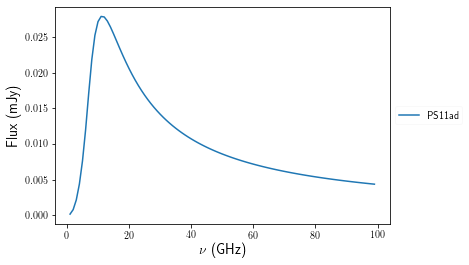

<Figure size 432x288 with 0 Axes>

In [16]:
#Synchrotron model of the fluxes
import numpy as np
plt.rc('text', usetex=True)

t =1224.288326 
t_p = 1224.288326 #days
nu =np.arange(1, 100, dtype=float)
nu_p = 10 #GHz
F_nup = 0.0272 #mjansky
m = 0.88 #using stAandard model
p = 3.0 #using standard model
a = (2*m)+0.5
b = (p+5-(6*m))/2

F_nu = F_nup*1.582*(t/t_p)**a*(nu/nu_p)**(5/2)*(1-np.exp(-(t/t_p)**(-(a+b))*(nu/nu_p)**(-(p+4)/2)))

print(F_nu)                                              

ax=plt.subplot(111)
plt.plot(nu,F_nu, label ='PS11ad')
plt.xlabel(r'$\nu$ (GHz)', fontsize=14) #Log$_{10}$ t$_{rest}$(days)($\u03BD$ /5 GHz)', fontsize=14)
plt.ylabel('Flux (mJy)', fontsize=14) #Log$_{10}$ Luminosity (erg $s^{-1}$ $Hz^{-1}$)', fontsize =14)
plt.legend(frameon=True, framealpha=0.1, loc='center left', bbox_to_anchor=(1, 0.5))
#ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()
plt.savefig('syn1.pdf')

In [18]:
#Radius at time t_p
alpha = 1  #fraction of charged particles and magnetic field (epsilon_e/epsilon_b)
f =  0.5   # filling factor (fraction of the emiting region)
D =  2129.4   # in Mpc distance to the SN

R = 4.0e14*(alpha)**(-1/19)*(f/0.5)**(-1/19)*(F_nup)**(9/19)*(D)**(18/19)*(nu_p)**(-1)
print (R)


1.0318719668997808e+16


In [19]:
# Magnetic field flux
B = 1.1*(alpha)**(-4/19)*(f/0.5)**(-4/19)*(F_nup)**(-2/19)*(D)**(-4/19)*(nu_p)
print (B)

3.202500225526985


In [20]:
#Internal energy of the emitting material
epsilon_b = 0.1
E = (1/epsilon_b)*((B**2)/(8* 3.142))*((4*3.142*f*R**3)/3)
print(E)

9.390193335062946e+48


In [21]:
#expansion velocity
v = R/t
print(v)

8428341143063.2295


In [22]:
#pre-explosion mass-loss in 1e-5 solar mass per year
v_w = 1000  #wind speed in km/s
M = 1.0*(alpha)**(-8/19)*epsilon_b*(f)**(-8/19)*(F_nup)**(-4/19)*(D)**(-4/19)*(nu_p)*(t_p/10)*(v_w/1000)
print(v_w)


1000
